In [1]:
!pip3 install torch torchvision

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip3 install opencv-python matplotlib

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip3 install --upgrade imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=80296b827dc358b5065afeb07ff9b25342bf593952e6f1e905b885a8602fb5ee
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
class FileVideoStream:
    def __init__(self, path, queueSize=128):
        self.stream = cv2.VideoCapture(path)
        self.stopped = False
        # initialize the queue used to store frames read from
        # the video file
        self.Q = Queue(maxsize=queueSize)
    def start(self):
        # start a thread to read frames from the file video stream
        t = Thread(target=self.update, args=())
        t.daemon = True
        t.start()
        return self
    def update(self):
        # keep looping infinitely
        while True:
            if self.stopped:
                return
            if not self.Q.full():
                # read the next frame from the file
                (grabbed, frame) = self.stream.read()
                # if the `grabbed` boolean is `False`, then we have
                # reached the end of the video file
                if not grabbed:
                    self.stop()
                    return
                # add the frame to the queue
                self.Q.put(frame)
    def read(self):
        # return next frame in the queue
        return self.Q.get()
    def more(self):
        # return True if there are still frames in the queue
        return self.Q.qsize() > 0
    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True

Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


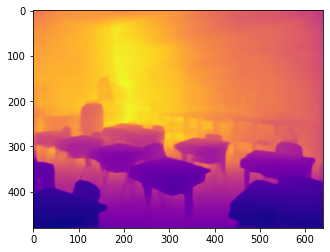

In [4]:
infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/classroom__rgb_00283.jpg")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2
from imutils.video import FileVideoStream
from imutils.video import FPS
from threading import Thread


infer_helper = InferenceHelper(dataset='nyu')

fvs = FileVideoStream("http://192.168.1.79:8080/stream/video.mjpeg").start()

while(fvs.more()):
    clear_output(wait=True)
    frame = fvs.read()
    #frame = cv2.resize(frame, (640, 480))
    #cv2.imshow('livestream', frame)
    #plt.imshow(frame)
    #plt.show()
    if cv2.waitKey(1) == ord("q"):
        break
    bin_centers, predicted_depth = infer_helper.predict_pil(frame)
    plt.imshow(predicted_depth[0][0], cmap='plasma')
    plt.show()

#capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2

infer_helper = InferenceHelper(dataset='nyu')

capture = cv2.VideoCapture("http://192.168.1.79:8080/stream/video.mjpeg")

while(True):
    clear_output(wait=True)
    ret, frame = capture.read()
    #frame = cv2.resize(frame, (640, 480))
    #cv2.imshow('livestream', frame)
    #plt.imshow(frame)
    #plt.show()
    if cv2.waitKey(1) == ord("q"):
        break
    bin_centers, predicted_depth = infer_helper.predict_pil(frame)
    plt.imshow(predicted_depth[0][0], cmap='plasma')
    plt.show()


capture.release()
cv2.destroyAllWindows()

In [ ]:
infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
img = Image.open("test_imgs/classroom__rgb_00283.jpg")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()